## Data Loading

In [32]:
import pandas as pd

try:
    df = pd.read_csv("/content/TITANIC DATASET.csv")
    display(df.head())
except:
  print("Error: 'TITANIC DATASET.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
  df = None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data exploration

In [33]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (891, 12)


In [34]:
print("DataFrame Information:")
df.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
print("Description statistics for numerical Features:")
df.describe()

Description statistics for numerical Features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
# Analyze categorical_feautres
Categorical_features = ['Sex', 'Embarked', 'Pclass']
for col in Categorical_features:
  print(f"\nValue Counts for '{col}':")
  display(df[col].value_counts())
  print(f"Observations fro '{col}':")
  if col == 'Sex':
      print("The Proportion of male and female passegners can be observed.")
  elif col == 'Embarked':
        print("The distribution of passengers across different embarkation points is shown.")
  elif col == 'Pclass':
        print("The distribution of passengers across different passenger classes is shown.")


Value Counts for 'Sex':


,count
Sex,
male,577
female,314


Observations fro 'Sex':
The Proportion of male and female passegners can be observed.

Value Counts for 'Embarked':


,count
Embarked,
S,644
C,168
Q,77


Observations fro 'Embarked':
The distribution of passengers across different embarkation points is shown.

Value Counts for 'Pclass':


,count
Pclass,
3,491
1,216
2,184


Observations fro 'Pclass':
The distribution of passengers across different passenger classes is shown.


## Data Visualization

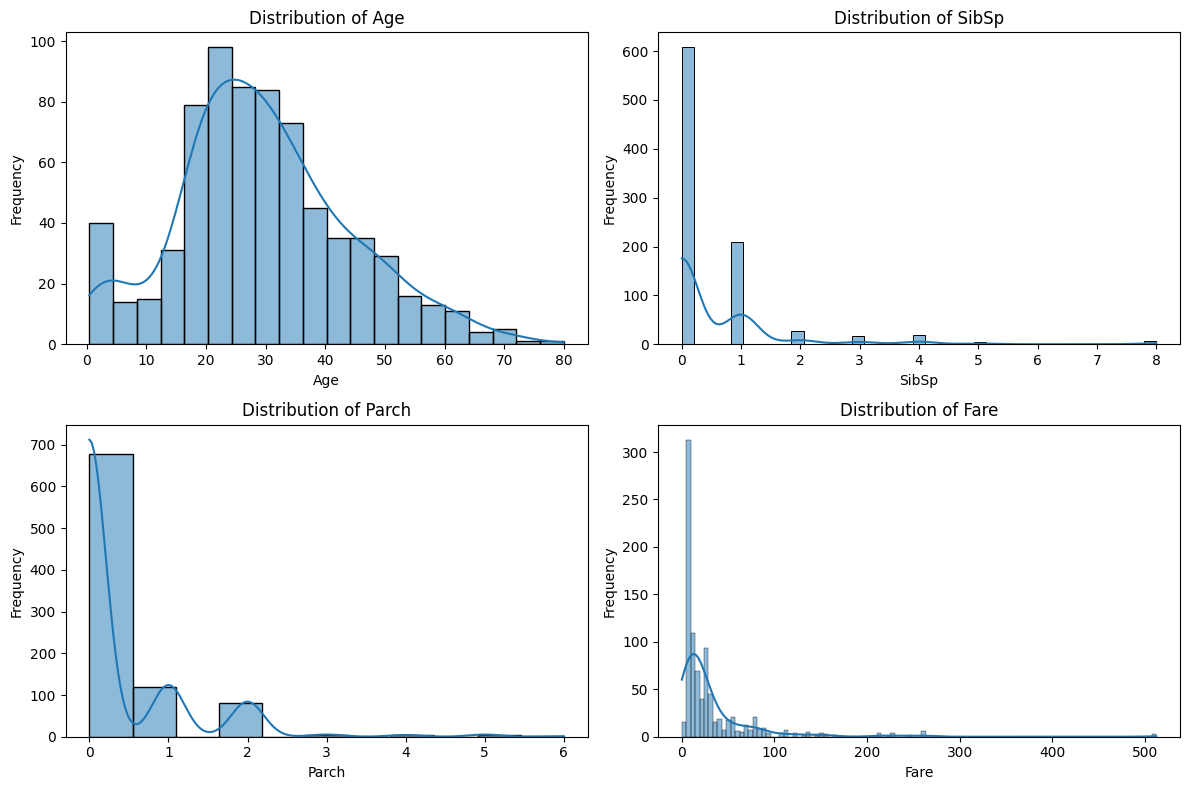

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

# histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    # kde=True adds a smooth curve to the histogram, visualizing the estimated probability density of the data.
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

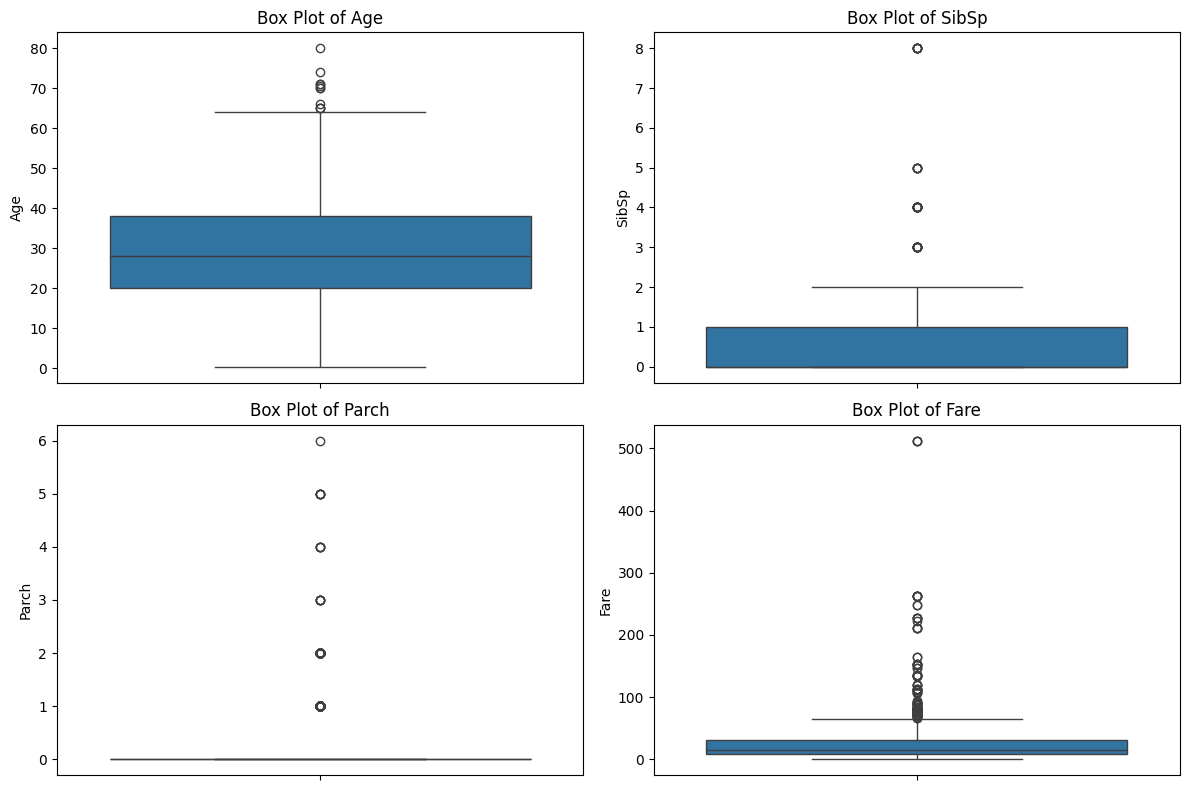

In [38]:
# box plots for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    # kde=True adds a smooth curve to the histogram, visualizing the estimated probability density of the data.
    sns.boxplot(y = df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

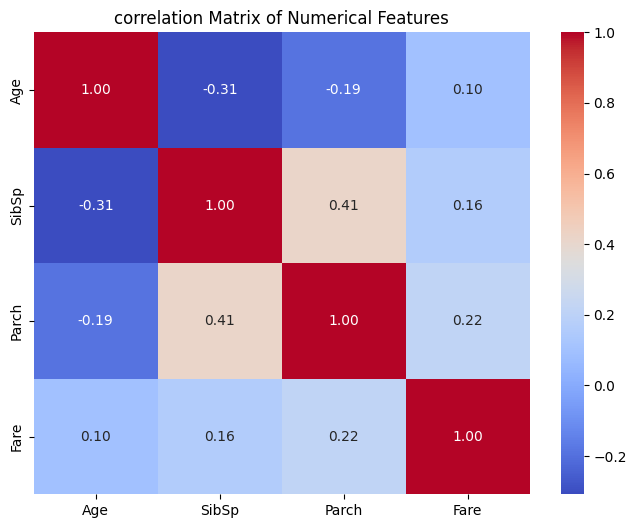

In [39]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot = True, cmap ='coolwarm', fmt=".2f")
plt.title('correlation Matrix of Numerical Features')
plt.show()

## Data Analysis

Analyze the relationships between variables and survival rates,

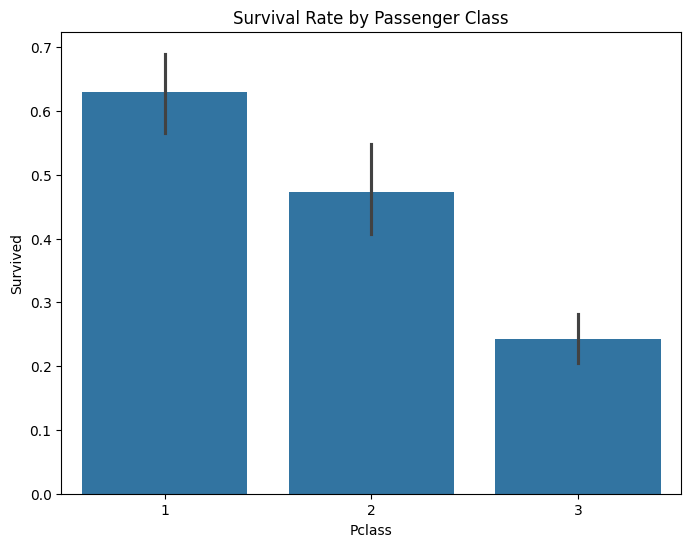

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

#Survival Rate by Passenger Class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

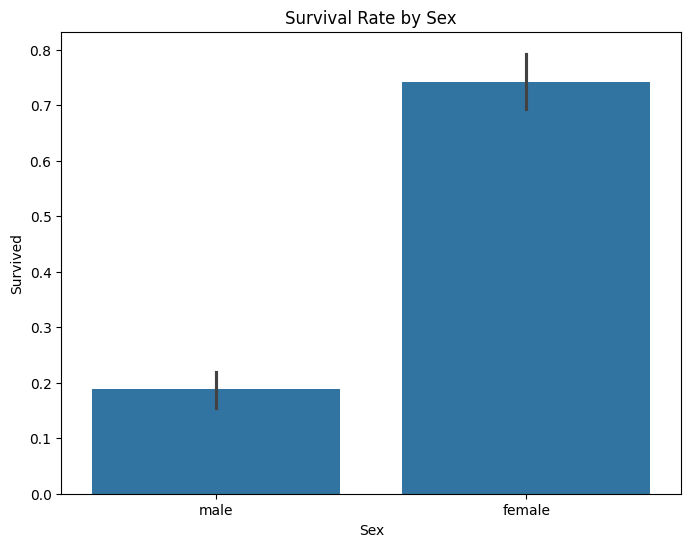

In [41]:
# Survival Rate by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

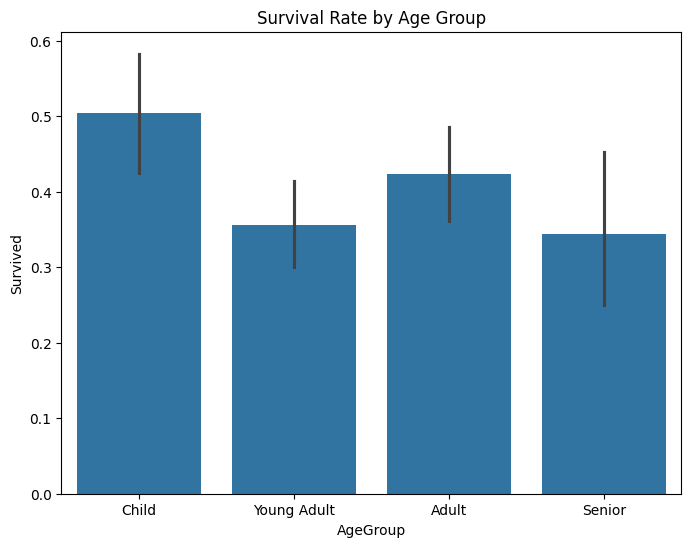

In [42]:
# Survival Rate by Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

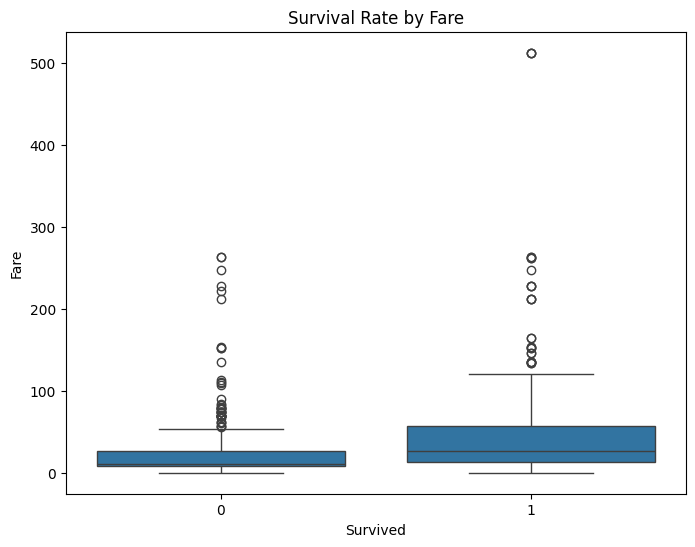

In [43]:
# 4. Survival Rate by Fare
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Survival Rate by Fare')
plt.show()

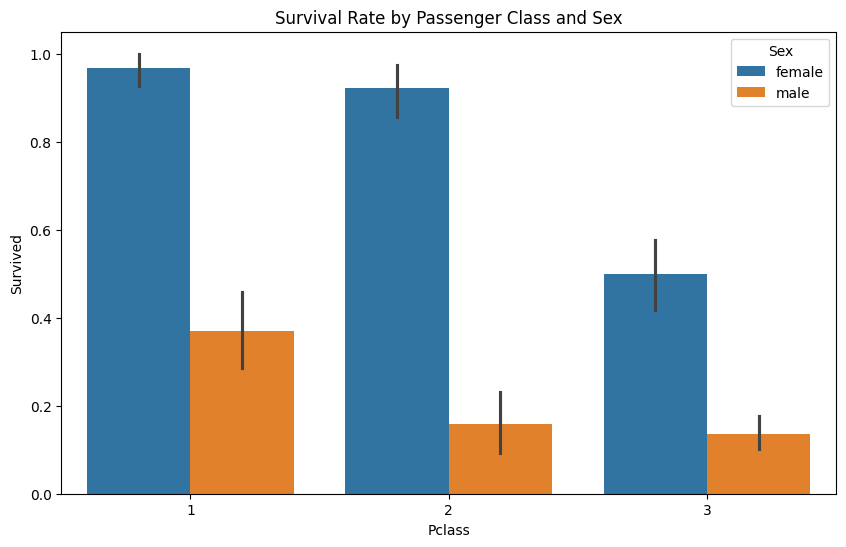

In [44]:
# 5. Combined Effects: Passenger Class and Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Passenger Class and Sex')
plt.show()

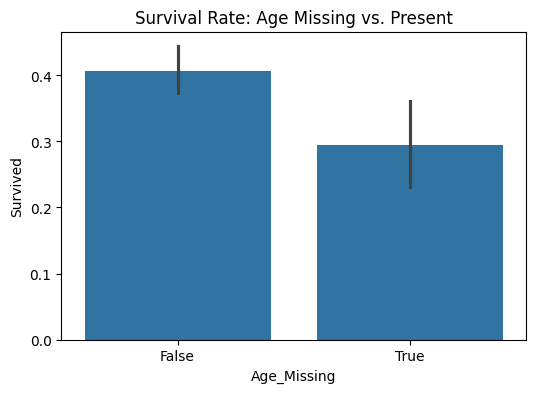

In [45]:
# Create a new column indicating whether 'Age' is missing
df['Age_Missing'] = df['Age'].isnull()
# Analyze survival rate based on Age missing status
plt.figure(figsize=(6, 4))
sns.barplot(x='Age_Missing', y='Survived', data=df)
plt.title('Survival Rate: Age Missing vs. Present')
plt.show()

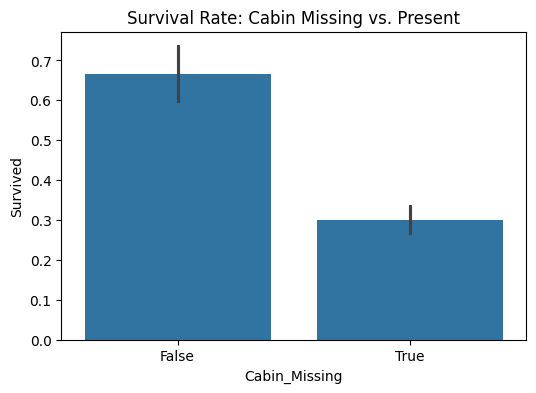

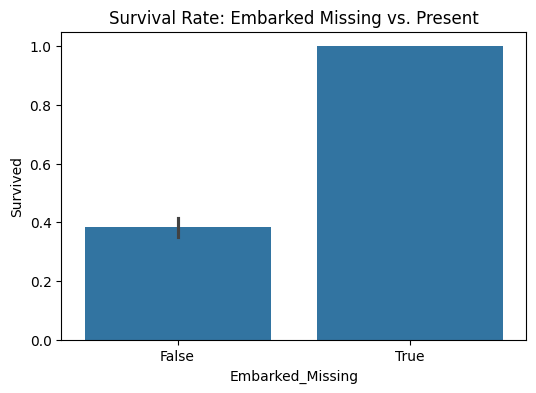

In [46]:
df['Cabin_Missing'] = df['Cabin'].isnull()
plt.figure(figsize=(6, 4))
sns.barplot(x='Cabin_Missing', y='Survived', data=df)
plt.title('Survival Rate: Cabin Missing vs. Present')
plt.show()

df['Embarked_Missing'] = df['Embarked'].isnull()
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked_Missing', y='Survived', data=df)
plt.title('Survival Rate: Embarked Missing vs. Present')
plt.show()

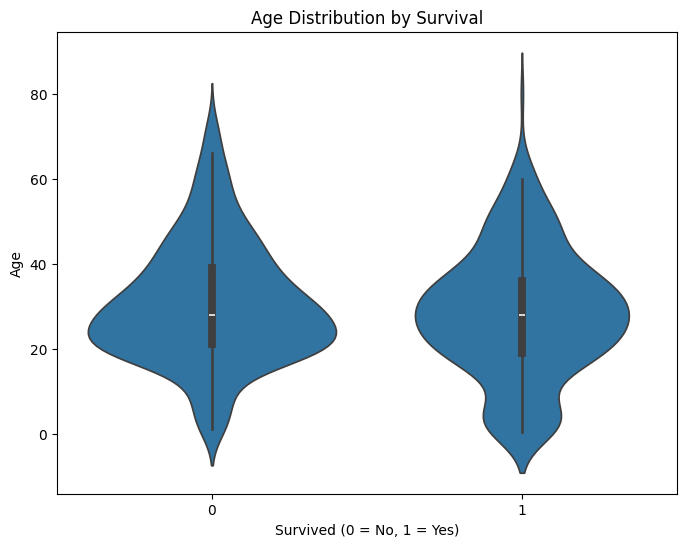

In [47]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

<Figure size 1000x800 with 0 Axes>

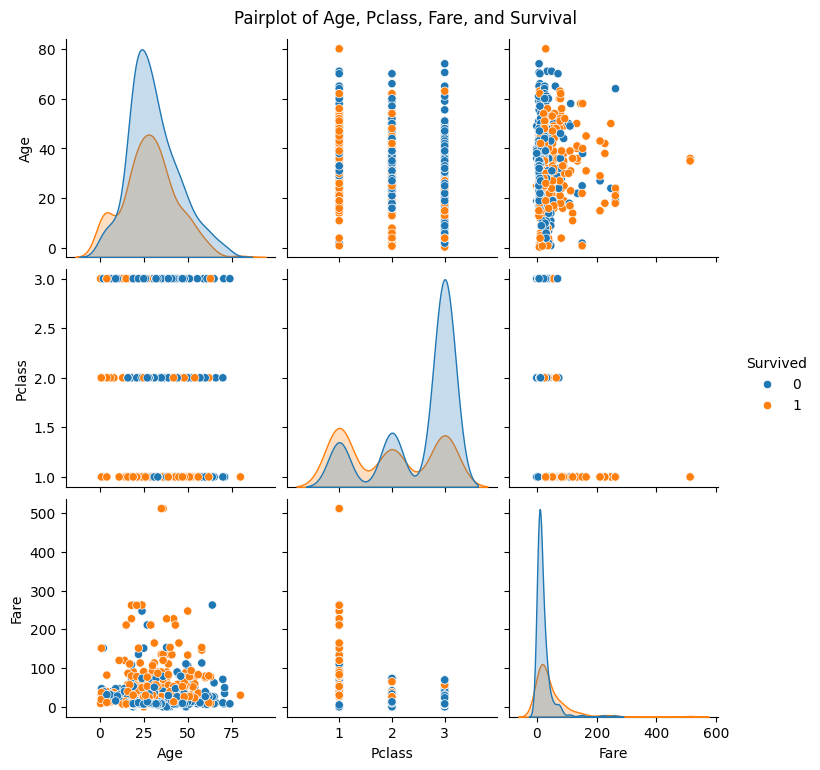

In [48]:
# Pairplot for Key Features
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Age', 'Pclass', 'Fare', 'Survived']], hue='Survived')
plt.suptitle('Pairplot of Age, Pclass, Fare, and Survival', y=1.02)
plt.show()

## Summary:

### Q&A

1. **What is EDA and why is it important?**  EDA (Exploratory Data Analysis) is the process of visually and statistically exploring data to understand its main characteristics, identify patterns, detect anomalies, and formulate hypotheses. It's crucial for gaining insights before applying any modeling techniques, ensuring data quality, and informing subsequent analysis steps.

2. **Which plots do you use to check correlation?** Heatmaps and scatter plots are commonly used to check correlation.  Pairplots can also show correlations between multiple variables simultaneously.

3. **How do you handle skewed data?**  Several methods exist, including transformations (logarithmic, square root), Winsorizing or clipping (capping values at certain percentiles), or using robust statistical methods less sensitive to outliers. The specific approach depends on the context and the nature of the skewness.

4. **How to detect multicollinearity?**  Correlation matrices (visualized as heatmaps) and Variance Inflation Factor (VIF) calculations can help detect multicollinearity among predictor variables.

5. **What are univariate, bivariate, and multivariate analyses?**  Univariate analysis examines one variable at a time. Bivariate analysis explores the relationship between two variables. Multivariate analysis involves multiple variables simultaneously.

6. **Difference between heatmap and pairplot?**  A heatmap displays the correlation coefficients between multiple variables in a grid format. A pairplot shows the pairwise relationships between multiple variables using scatter plots, histograms, and/or kernel density estimations.  A pairplot provides more detailed visual information than a heatmap.

7. **How do you summarize your insights?** Insights can be summarized through written reports, presentations, or visualizations. Key findings, patterns, and trends should be highlighted along with supporting evidence (e.g., statistics, charts).


## Data Analysis Key Findings

*   **Missing Values:**  Significant missing values were found in 'Age', 'Cabin', and 'Embarked' columns. These were imputed using the median (for 'Age'), a binary indicator (for 'Cabin'), and the mode (for 'Embarked').
*   **Outlier Handling:** Outliers in the 'Fare' column were capped at the 95th percentile.
*   **Survival Correlation with Passenger Class:**  Lower passenger classes ('Pclass' 3) showed lower survival rates compared to higher classes (1 and 2).
*   **Survival Correlation with Sex:** Females had significantly higher survival rates than males.
*   **Survival Correlation with Age:**  Survival rates varied across different age groups, with children potentially having higher survival rates.  A more detailed analysis of age distributions would be needed.
*   **Survival Correlation with Fare:** Higher fares tended to correlate with higher survival rates.  The box plots provided visual confirmation of this trend.
*   **Combined Effects:**  Passenger class and sex had combined effects on survival.  For example, females in higher classes had the highest survival rates.
*   **Missing Data Impact:** The presence or absence of 'Age', 'Cabin', and 'Embarked' information appeared to correlate with survival rates.  Further investigation would be needed to explore these relationships more thoroughly.
* **Feature Engineering:**  A new 'FamilySize' feature was created by combining 'SibSp' and 'Parch' to potentially reveal the influence of family size on survival.
